In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from PIL import ImageGrab

In [2]:
import warnings
warnings.filterwarnings('ignore')

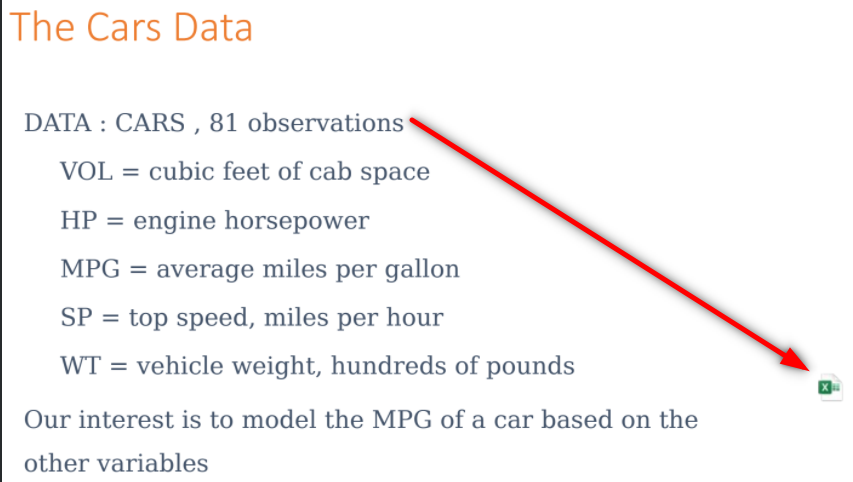

In [10]:
ImageGrab.grabclipboard()

In [3]:
cars = pd.read_csv("Cars.csv")
cars.tail(10)

,HP,MPG,VOL,SP,WT
71,162,23.203569,135,133.415985,44.013139
72,162,23.203569,132,133.140074,43.353123
73,140,19.086341,160,124.715241,52.997752
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


# Correlation Matrix 

In [4]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Plotting Correlation (Pair Plot) 

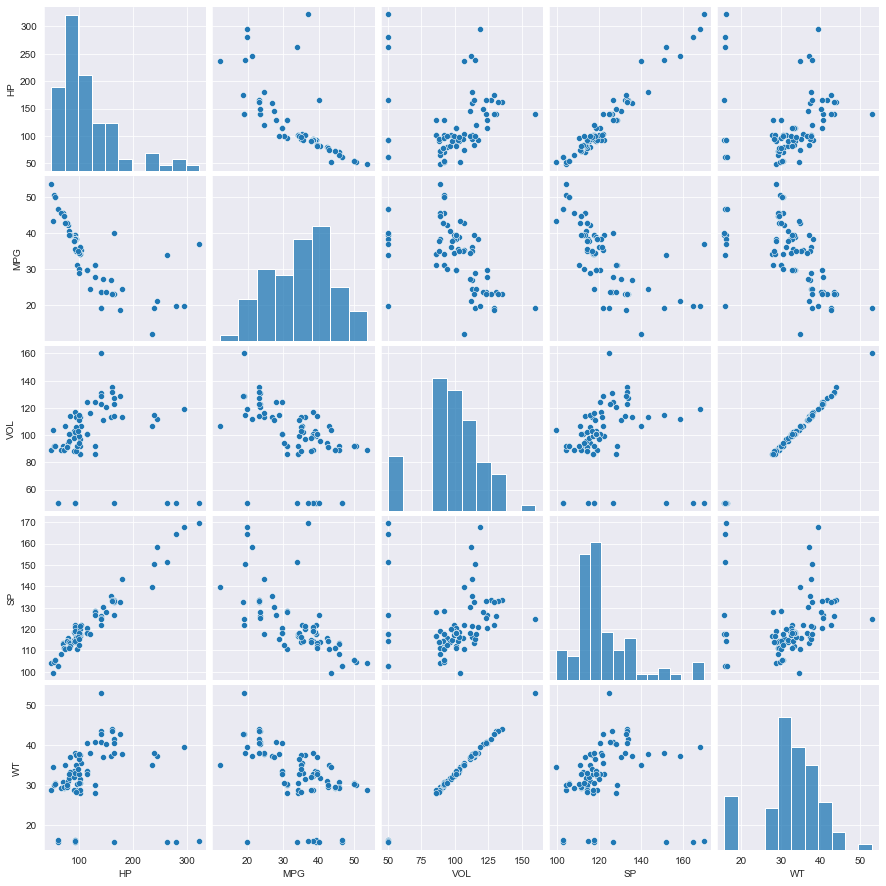

In [5]:
sns.set_style(style = 'darkgrid')
sns.pairplot(cars)

# Preparing a Model

In [6]:
model = smf.ols("MPG~HP+VOL+SP+WT", data = cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.54e-23
Time:                        23:44:15   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [8]:
display(model.tvalues, model.pvalues)

Intercept    2.058841
HP          -5.238735
VOL         -0.590970
SP           2.499880
WT           0.236541
dtype: float64

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

In [9]:
model.rsquared,model.rsquared_adj

(0.7705372737359844, 0.7584602881431415)

# Simple Linear regression

In [10]:
model_wt = smf.ols("MPG~WT", data =cars).fit()
model_wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           4.38e-07
Time:                        23:44:23   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model_vol = smf.ols("MPG~VOL", data =cars).fit()
model_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           3.82e-07
Time:                        23:44:23   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating VIF (Variance Inflation factor)

In [12]:
r_sqr_vol = smf.ols('VOL~HP+WT+SP', data = cars).fit().rsquared
vif_vol = 1/(1-r_sqr_vol)
r_sqr_wt = smf.ols('WT~HP+VOL+SP', data = cars).fit().rsquared
vif_wt = 1/(1-r_sqr_wt)
r_sqr_sp = smf.ols('SP~WT+HP+VOL', data = cars).fit().rsquared
vif_sp = 1/(1-r_sqr_sp)
r_sqr_hp = smf.ols('HP~WT+VOL+SP', data = cars).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)

## Store VIF values in DataFrame

In [13]:
vif_frame = pd.DataFrame({'Variables':['VOL','WT','SP','HP'], 'VIF':[vif_vol,vif_wt,vif_sp,vif_hp]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

,VIF
Variables,
HP,19.926589
SP,20.007639
VOL,638.806084
WT,639.533818


## Another Meowthod to find VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = cars[['HP','SP','WT','VOL']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
0,HP,11.191296
1,SP,50.541968
2,WT,12172.827328
3,VOL,12708.789369


In [15]:
x

,HP,SP,WT,VOL
0,49,104.185353,28.762059,89
1,55,105.461264,30.466833,92
2,55,105.461264,30.193597,92
3,70,113.461264,30.632114,92
4,53,104.461264,29.889149,92
...,...,...,...,...
76,322,169.598513,16.132947,50
77,238,150.576579,37.923113,115
78,263,151.598513,15.769625,50
79,295,167.944460,39.423099,119


In [16]:
alternate_model = smf.ols('MPG~WT+SP+HP', data = cars).fit()
alternate_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.81e-24
Time:                        23:44:30   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
SP             0.4078      0.156      2.609      0.011       0.097       0.719
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#t and p_values
print(alternate_model.tvalues, '\n', alternate_model.pvalues)

Intercept    1.986465
WT          -8.894562
SP           2.609482
HP          -5.386453
dtype: float64 
 Intercept    5.053995e-02
WT           1.914892e-13
SP           1.089096e-02
HP           7.560276e-07
dtype: float64


In [20]:
#t and p_values
print(final_model.tvalues, '\n', final_model.pvalues)

Intercept    2.068548
SP           2.570678
VOL         -8.928340
HP          -5.353199
dtype: float64 
 Intercept    4.194554e-02
SP           1.207855e-02
VOL          1.648229e-13
HP           8.644870e-07
dtype: float64


In [19]:
final_model = smf.ols('MPG~SP+VOL+HP', data = cars).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.56e-24
Time:                        23:44:32   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
SP             0.4007      0.156      2.571      0.012       0.090       0.711
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

In [21]:
#Residuals values  = y - yhat

In [22]:
model.resid.min()

-8.631961053868395

In [23]:
model.resid

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Length: 81, dtype: float64

In [24]:
# Fitted Value is the Predicted values

In [25]:
model.fittedvalues

0     43.441935
1     42.388793
2     42.279341
3     42.538360
4     42.172648
        ...    
76    21.282096
77    17.899050
78    26.136453
79    12.316612
80    15.559481
Length: 81, dtype: float64

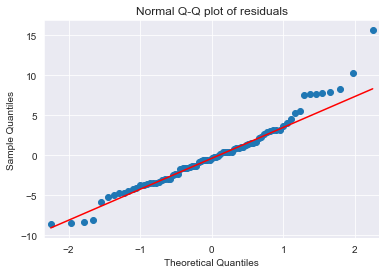

In [26]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [27]:
list(np.where(model.resid>10))

[array([ 0, 76], dtype=int64)]

## Residual Plot for Homoscedasticity 

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

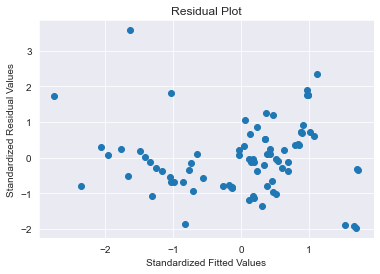

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

#  Residual VS Regressors

eval_env: 1


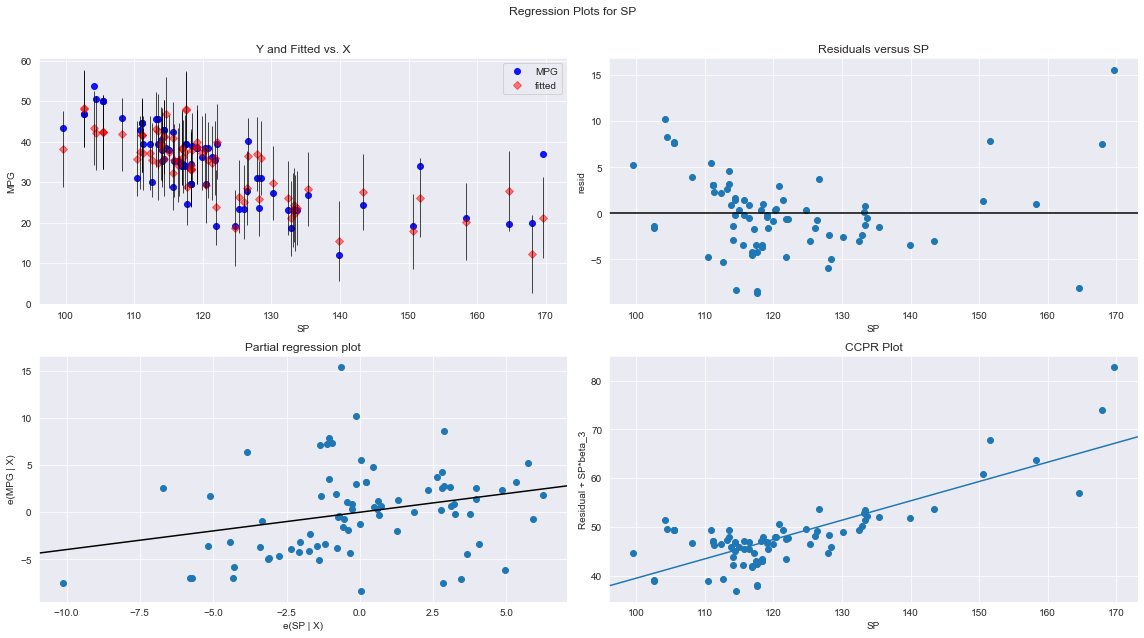

In [30]:
fig = plt.figure(figsize = (16,9))
plot_SP = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

eval_env: 1


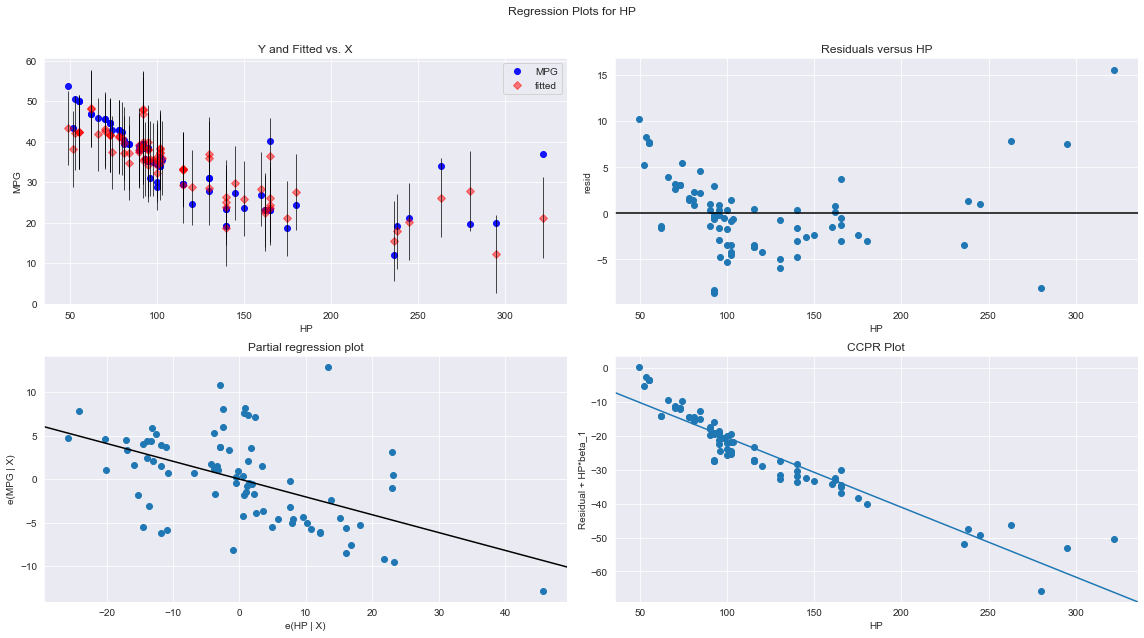

In [31]:
fig = plt.figure(figsize = (16,9))
plot_HP = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

eval_env: 1


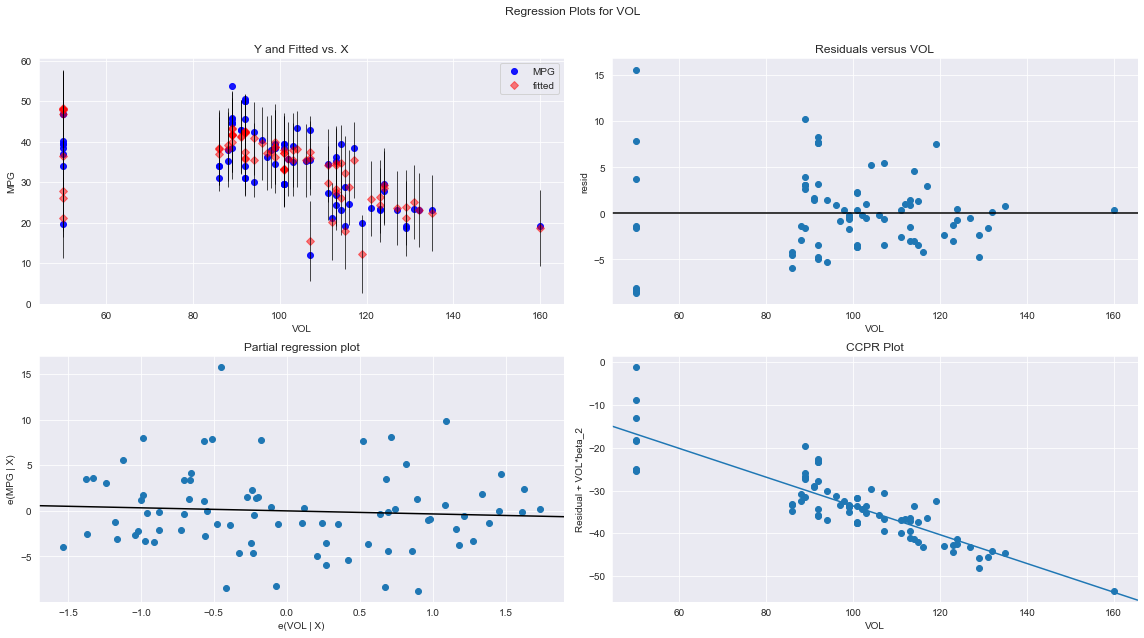

In [32]:
fig = plt.figure(figsize = (16,9))
plot_VOL = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

eval_env: 1


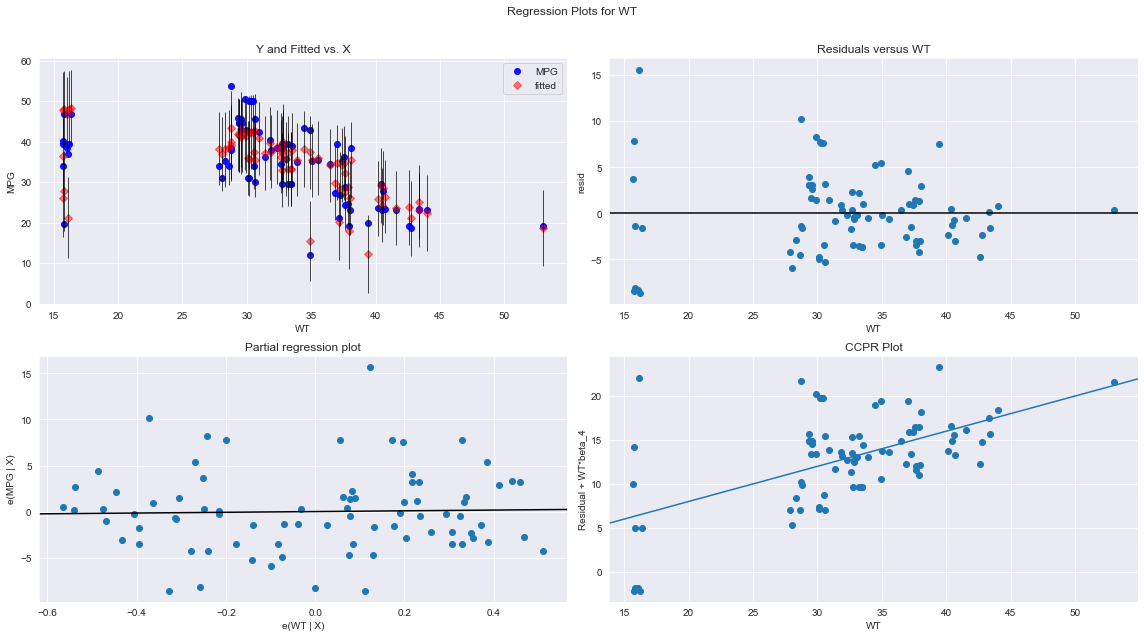

In [33]:
fig = plt.figure(figsize = (16,9))
plot_WT = sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

#  Model deletion Diagnostics

## Detecting Influencers/Outliers

##  Cook's Distance

In [34]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [35]:
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

In [36]:
_

array([0.99749559, 0.999611  , 0.99986003, 0.99998609, 0.99955511,
       0.99999503, 0.9998141 , 0.99999897, 0.99999675, 0.99999995,
       0.9999985 , 0.99403955, 0.99999999, 0.99999838, 0.99999376,
       0.9999937 , 0.99999986, 0.99565009, 0.99999997, 0.99999997,
       1.        , 0.999967  , 1.        , 0.99999999, 0.99999973,
       0.99767993, 0.99996892, 1.        , 0.9994181 , 1.        ,
       0.99993697, 0.9999999 , 0.99999999, 0.99999986, 0.99999865,
       1.        , 0.99999999, 0.99999529, 0.99995016, 0.99997662,
       1.        , 1.        , 0.99999581, 0.99999583, 1.        ,
       0.99999998, 1.        , 1.        , 0.99994456, 0.99999357,
       0.99999849, 0.99999452, 1.        , 0.99995725, 0.99999993,
       1.        , 0.99992953, 0.99999327, 0.99994468, 0.99999732,
       0.99999879, 0.99995818, 0.99999979, 0.99999741, 0.9999988 ,
       0.99974271, 0.99999212, 1.        , 0.99999997, 0.99999956,
       0.94273321, 0.99999996, 1.        , 1.        , 0.99981

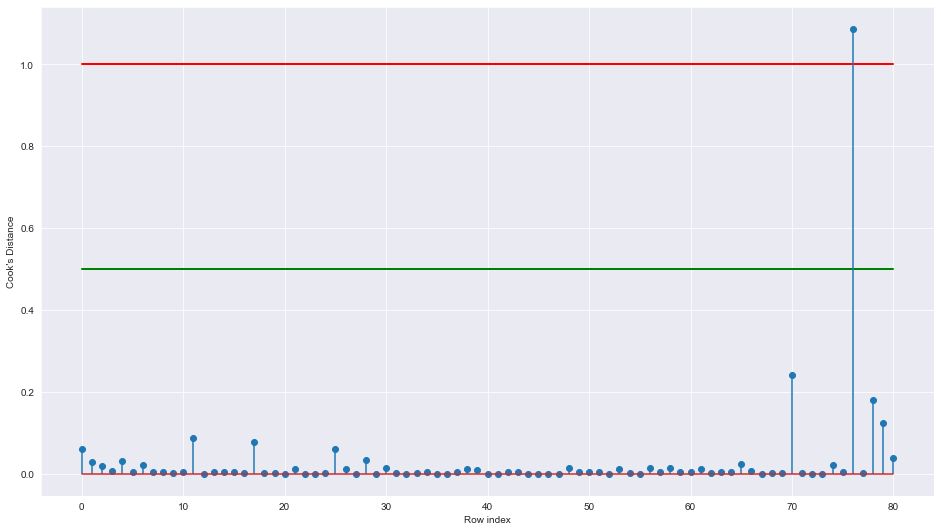

In [37]:
fig = plt.figure(figsize = (16,9))
x = [0,80]
y = [1.0,1.0]
plt.plot(x, y,color='red', linewidth=2)
y1 = [0.5,0.5]
plt.plot(x , y1, color = 'green', linewidth = 2)
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

### Index and value of incluencer where c is more than .5

In [38]:
(np.argmax(c),np.max(c))

(76, 1.0865193998180043)

In [39]:
cars.HP.idxmax()

76

# High Influence Points

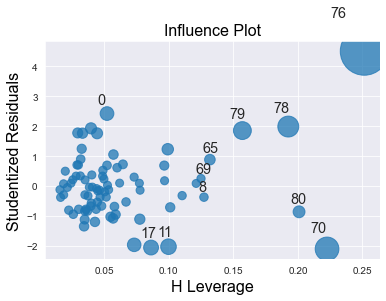

In [40]:
influence_plot(model)
plt.show()

In [41]:
cars.shape

(81, 5)

In [42]:
k = cars.shape[1] # Numbers of columns
n = cars.shape[0] # Numbers of rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.2222222222222222

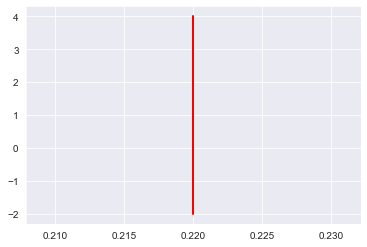

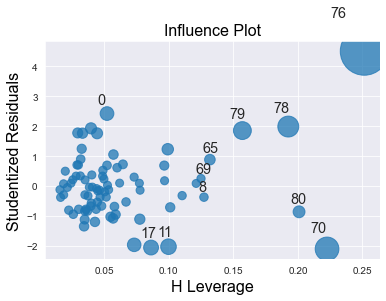

In [43]:
x = [0.22,0.22]
y = [-2,4]
plt.plot(x, y, color ='red', linewidth = 2)
influence_plot(model)
plt.show()

### From the above plot, it is evident that point 70 and 76 are the influencers

In [44]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [45]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## Improving the model 

In [46]:
cars1 = cars.drop(cars.index[[70,76]],axis = 0).reset_index()
cars1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [47]:
cars1.drop(['index'], axis = 1, inplace = True)

In [48]:
cars1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Rebuild Model 

In [49]:
rebuild_model = smf.ols("MPG~VOL+SP+HP", data = cars1).fit()
rebuild_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     111.0
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.65e-27
Time:                        23:45:21   Log-Likelihood:                -219.06
No. Observations:                  79   AIC:                             446.1
Df Residuals:                      75   BIC:                             455.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5275     13.051      1.956      0.054      -0.471      51.526
VOL           -0.1825      0.023     -8.012      0.000      -0.228      -0.137
SP             0.4415      0.141      3.124      0.003       0.160       0.723
HP            -0.2291      0.035     -6.592      0.000      -0.298      -0.160
==============================================================================
Omnibus:                        6.541   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.833
Skew:                           0.620   Prob(JB):                       0.0541
Kurtosis:                       3.485   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Again Calculate Cook's Distance

In [50]:
model_influence_again = rebuild_model.get_influence()
(ck_d, __) = model_influence_again.cooks_distance

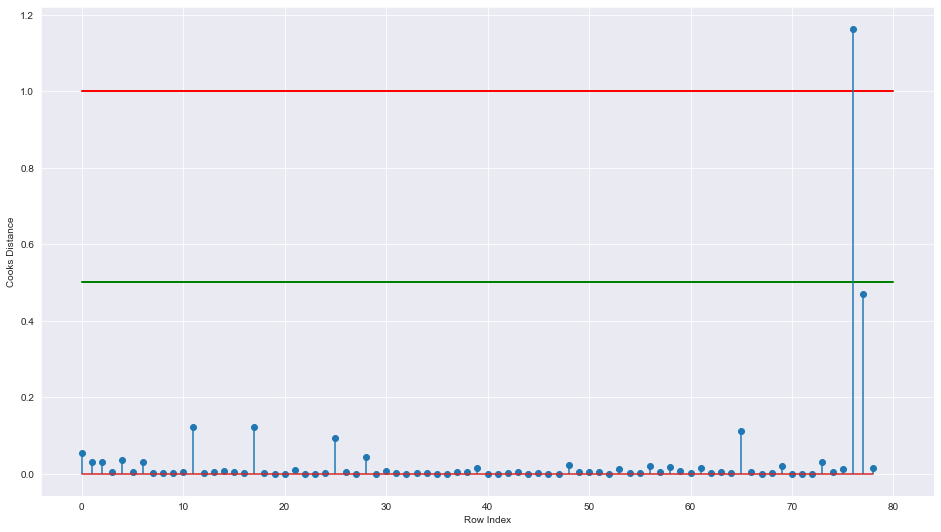

In [51]:
fig = plt.figure(figsize = (16,9))
x = [0,80]
y = [1.0,1.0]
plt.plot(x, y,color='red', linewidth=2)
y1 = [0.5,0.5]
plt.plot(x , y1, color = 'green', linewidth = 2)
plt.stem(np.arange(len(cars1)), np.round(ck_d,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
(np.argmax(ck_d),np.max(ck_d))

(76, 1.1629387469135357)

In [53]:
np.argmax(ck_d > 0.4)

76

In [54]:
ck_d>0.4

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False])

In [55]:
np.array(ck_d[np.argmax(ck_d > 0.4)])

array(1.16293875)

### Index of the data points where Cooks Distance is more than .5

In [56]:
np.where(ck_d > 0.4)

(array([76, 77], dtype=int64),)

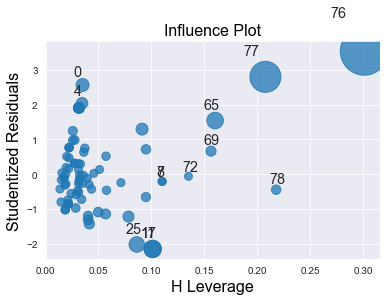

In [57]:
influence_plot(rebuild_model)
plt.show()

### Drop The High Leverage Points

In [58]:
cars2 = cars1.drop(cars1.index[[76,77]], axis = 0).reset_index()
cars2.drop(['index'], axis = 1, inplace = True)
cars2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


# Build Model Again 

In [59]:
final_model = smf.ols("MPG~SP+VOL+HP", data = cars2).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           6.81e-32
Time:                        23:45:24   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
SP             0.4335      0.122      3.560      0.001       0.191       0.676
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Again Check for Influencers
model_influence = final_model.get_influence()
(c, p) = model_influence.cooks_distance

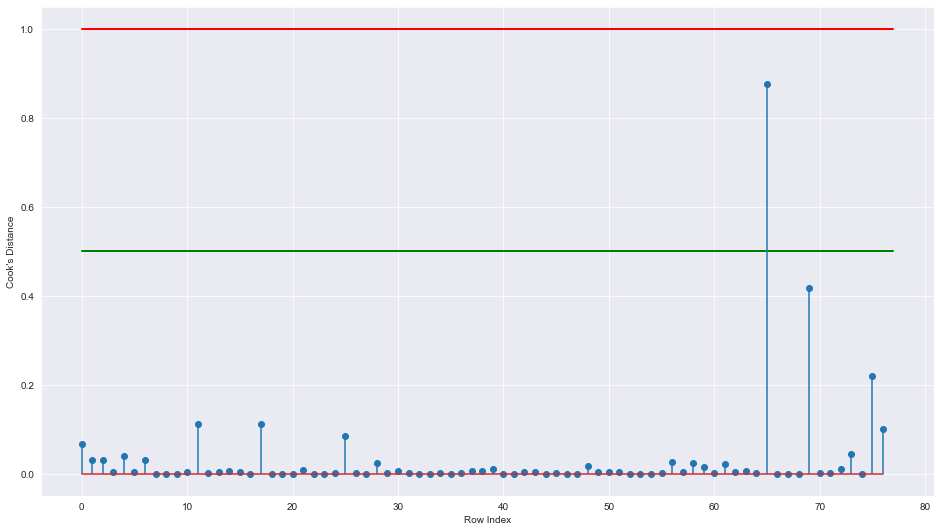

In [61]:
fig = plt.figure(figsize = (16,9))
x = [0,77]
y = [1.0,1.0]
y1 = [0.5,0.5]
plt.plot(x,y , color = 'red', linewidth = 2)
plt.plot(x,y1, color = 'green', linewidth = 2)
plt.stem(np.arange(len(cars2)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.show()

In [62]:
np.where(c > 0.5)

(array([65], dtype=int64),)

###  Since the cook's Distance is <1 now , we can stop the diagnostic and process and finalize the model

In [63]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           6.81e-32
Time:                        23:45:26   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
SP             0.4335      0.122      3.560      0.001       0.191       0.676
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  Predicting for New Data

In [64]:
mpg_predict = pd.DataFrame({'HP':40,'VOL':95,'SP':102}, index = [1])
mpg_predict

,HP,VOL,SP
1,40,95,102


In [65]:
mpg_predict['MPG'] = np.round(final_model.predict(mpg_predict),)
mpg_predict

,HP,VOL,SP,MPG
1,40,95,102,46.0


In [66]:
cars2.pop('WT')
last_column = cars2.pop('MPG')
cars2.insert(3, 'MPG', last_column)
cars2.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [67]:
final_model.predict(cars2.iloc[0:5,0:3])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [68]:
cars2.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
